In [1]:
%pip install transformers datasets --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 101.8 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.7/468.7 KB 47.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 103.7 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.8/199.8 KB 24.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.9/132.9 KB 16.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 71.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.2/212.2 KB 24.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 KB 16.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.8/158.8 KB 20.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 264.6/264.6 KB 29.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.2/114.2 KB 7.5 MB/s eta 0:00:00


In [3]:

import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [4]:
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification

tokenizer = DistilBertTokenizer.from_pretrained("distilbert-base-uncased")
model = DistilBertForSequenceClassification.from_pretrained('martingrzzler/distilbert-sensory-modality')
model.to(device)

DistilBertForSequenceClassification(
  (distilbert): DistilBertModel(
    (embeddings): Embeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (transformer): Transformer(
      (layer): ModuleList(
        (0): TransformerBlock(
          (attention): MultiHeadSelfAttention(
            (dropout): Dropout(p=0.1, inplace=False)
            (q_lin): Linear(in_features=768, out_features=768, bias=True)
            (k_lin): Linear(in_features=768, out_features=768, bias=True)
            (v_lin): Linear(in_features=768, out_features=768, bias=True)
            (out_lin): Linear(in_features=768, out_features=768, bias=True)
          )
          (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (ffn): FFN(
            (dropout): Dropout(p=0.1, inplace=False)
       

In [5]:
device

device(type='cuda')

In [6]:
from datasets import load_dataset

ds = load_dataset('martingrzzler/mnemonics_benchmark')

Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Dataset json downloaded and prepared to /root/.cache/huggingface/datasets/martingrzzler___json/martingrzzler--mnemonics_benchmark-6cc75b71b93e3c15/0.0.0/fe5dd6ea2639a6df622901539cb550cf8797e5a6b2dd7af1cf934bed8e233e6e. Subsequent calls will reuse this data.


  0%|          | 0/1 [00:00<?, ?it/s]

In [8]:
import nltk

nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [9]:
import re
from nltk import word_tokenize
from nltk.corpus import stopwords

sw = set(stopwords.words('english'))

def tokenize(text, menmonic_words = set()):
    text = re.sub('<.*?>', '', text)
    tokens = word_tokenize(text)
    filtered_tokens = [w for w in tokens if not w in sw and not w in menmonic_words]
    filtered_tokens = [w for w in filtered_tokens if w.isalpha()]

    return filtered_tokens

In [15]:
sample = ds['train'][0]
sample

{'kanji_id': 1885,
 'component_meanings': 'woman,catapult',
 'wanikani_mnemonic': "A <radical>woman</radical> loves her <radical>catapult</radical> for some good ol' fashioned <kanji>recreation</kanji>. You ask the woman what she does for fun... for recreation. She says, she goes out and shoots her catapult.",
 'kanji_meaning': 'recreation',
 'gpt2xl_mnemonic': "This is a rush transcript. Copy may not be in its final form, recreation of woman being catapulted to her death has been edited out.)\n\n\nAMY GOODMAN: We begin today's show with the shocking news that two women have died after jumping from an overpass near Los Angeles International Airport and landing on I-5 southbound just before",
 'gpt3_paragraph': 'A woman was using a catapult for recreation in her backyard. She was having a blast launching objects into the air and watching them fly. She was enjoying the peacefulness of the moment and the satisfaction of her successful shots.',
 'gpt3_mnemonic': "Once upon a time there was

In [16]:
tokenize(sample['wanikani_mnemonic'], set(sample['component_meanings'].split(',') + [sample['kanji_meaning']]))

['A',
 'loves',
 'good',
 'ol',
 'fashioned',
 'You',
 'ask',
 'fun',
 'She',
 'says',
 'goes',
 'shoots']

In [52]:
from scipy.stats import f_oneway
def anova(ds):
    f, p = f_oneway(ds['gpt3_paragraph_ser_mean'], ds['gpt3_mnemonic_ser_mean'], ds['gpt3_mnemonic_ser_mean'], ds['wanikani_ser_mean'], ds['gpt2xl_ser_mean'])
    return p

In [53]:
import matplotlib.pyplot as plt

def box_plot(df, title):
    fig, ax = plt.subplots(1,1)
    ax.boxplot([df['gpt3_paragraph_ser_mean'], df['gpt3_mnemonic_ser_mean'], df['wanikani_ser_mean'], df['gpt2xl_ser_mean']])
    ax.set_xticklabels(['GPT-3 Paragraph', 'GPT-3 Mnemonic', 'WaniKani', 'GPT-2XL'])
    ax.set_title(title)
    plt.show()

In [30]:
def predict(word):
    inputs = tokenizer(word, return_tensors="pt", truncation=True, padding='max_length', max_length=10).to(device)
    outputs = model(**inputs)
    return outputs.logits.item()

In [37]:
def ser_sorted_scores(text):
    tokens = tokenize(text)
    scores = [predict(token) for token in tokens]
    return sorted(scores, reverse=True)

def map_ser_scores(bar=None):
    def func(example):
        example['gpt3_paragraph_ser'] = ser_sorted_scores(example['gpt3_paragraph'])
        example['gpt3_mnemonic_ser'] = ser_sorted_scores(example['gpt3_mnemonic'])
        example['wanikani_ser'] = ser_sorted_scores(example['wanikani_mnemonic'])
        example['gpt2xl_ser'] = ser_sorted_scores(example['gpt2xl_mnemonic'])

        if bar is not None:
            bar.update(1)
        return example
    return func

In [38]:
from tqdm.auto import tqdm

bar = tqdm(total=len(ds['train']))
ds_scores = ds.map(map_ser_scores(bar))

  0%|          | 0/190 [00:00<?, ?it/s]

Map:   0%|          | 0/190 [00:00<?, ? examples/s]

In [69]:
import numpy as np

def n_mean(scores, n=np.inf):
    n = min(n, len(scores))

    return np.mean(scores[:n])

def prop_mean(scores, prop=1.0):
    n = int(prop * len(scores))
    if n == 0:
        n = 1

    return np.mean(scores[:n])

def map_prop_mean_score(prop=1.0):
    def func(example):
        example['gpt3_paragraph_ser_mean'] = prop_mean(example['gpt3_paragraph_ser'], prop)
        example['gpt3_mnemonic_ser_mean'] = prop_mean(example['gpt3_mnemonic_ser'], prop)
        example['wanikani_ser_mean'] = prop_mean(example['wanikani_ser'], prop)
        example['gpt2xl_ser_mean'] = prop_mean(example['gpt2xl_ser'], prop)

        return example
    return func

In [70]:
ds_mean = ds_scores.map(map_prop_mean_score())

Map:   0%|          | 0/190 [00:00<?, ? examples/s]

In [71]:
p = anova(ds_mean['train'])

print(f'p-value: {p}')

p-value: 9.83447194376252e-12


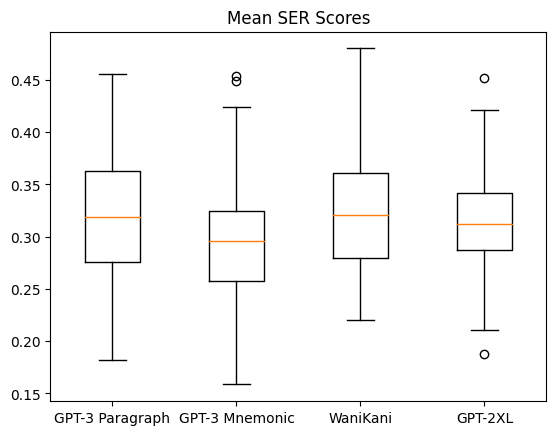

In [72]:
box_plot(ds_mean['train'], 'Mean SER Scores')

In [73]:
ds_mean_10 = ds_scores.map(map_prop_mean_score(0.1))

Map:   0%|          | 0/190 [00:00<?, ? examples/s]

In [74]:
p = anova(ds_mean_10['train'])

print(p)

0.17716033352770316


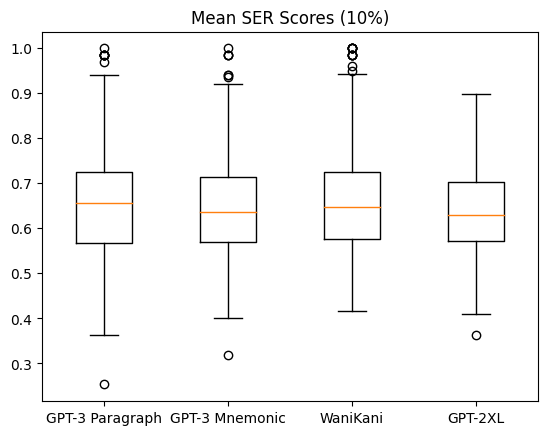

In [76]:
box_plot(ds_mean_10['train'], 'Mean SER Scores (10%)')

In [77]:
ds_mean_20 = ds_scores.map(map_prop_mean_score(0.2))

Map:   0%|          | 0/190 [00:00<?, ? examples/s]

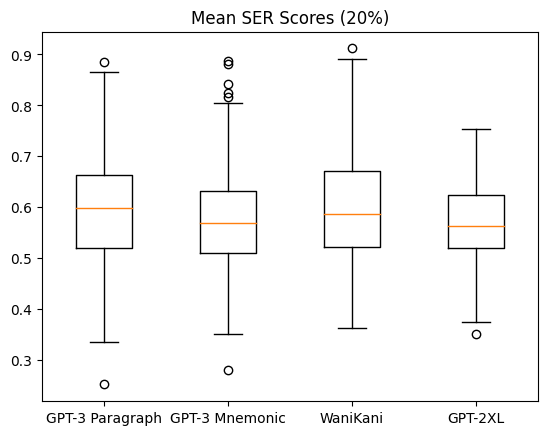

In [78]:
box_plot(ds_mean_20['train'], 'Mean SER Scores (20%)')

In [79]:
ds_mean_50 = ds_scores.map(map_prop_mean_score(0.5))

Map:   0%|          | 0/190 [00:00<?, ? examples/s]

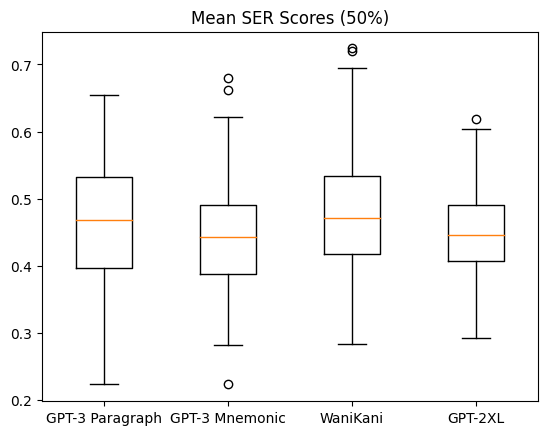

In [80]:
box_plot(ds_mean_50['train'], 'Mean SER Scores (50%)')